In [18]:
#Importing all the libraries needed.
import csv
from math import sqrt, exp, pi
from random import randrange
import random
import pandas as pd

In [19]:
#Taking the CSV file as input dataset.
def opening_csv(file_path):
    csv_file = []
    with open(file_path, 'r') as file:
        csv_reader = csv.reader(file)
        for R in csv_reader:
            csv_file.append(R)
    return csv_file

In [20]:
def converting_to_df(my_list):

  a=['Name', 'Hobby', 'Age', 'Educational level', 'Marital status', 'Class']
  b=['Buying', 'Maintenance', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class']
  c=['Irradiat', 'Age', 'Menopause', 'Tumor_size', 'Inv_nodes', 'Node_caps', 'Deg_malig', 'Breast', 'Breast_quad', 'Class']
  if my_list==hayes_roth_data:
    df = pd.DataFrame(my_list,columns=a)
    print(df)
  elif my_list==car_data:
    df = pd.DataFrame(my_list,columns=b)
    print(df)
  else:
    df = pd.DataFrame(my_list,columns=c)
    print(df)


hayes_roth_data = opening_csv('hayes-roth.csv')
car_data = opening_csv('car.csv')
breast_cancer_data = opening_csv('breast-cancer.csv')

converting_to_df(hayes_roth_data)
converting_to_df(car_data)
converting_to_df(breast_cancer_data)


    Name Hobby Age Educational level Marital status Class
0     92     2   1                 1              2     1
1     10     2   1                 3              2     2
2     83     3   1                 4              1     3
3     61     2   4                 2              2     3
4    107     1   1                 3              4     3
..   ...   ...  ..               ...            ...   ...
127   44     1   1                 4              3     3
128   40     2   1                 2              1     1
129   90     1   2                 1              2     2
130   21     1   2                 2              1     2
131    9     3   1                 1              2     1

[132 rows x 6 columns]
     Buying Maintenance  Doors Persons Lug_boot Safety  Class
0     vhigh       vhigh      2       2    small    low  unacc
1     vhigh       vhigh      2       2    small    med  unacc
2     vhigh       vhigh      2       2    small   high  unacc
3     vhigh       vhigh      2  

In [21]:
def check_null_nan(data):
    num_cols = len(data[0])
    for col in range(num_cols):
        null_count = 0
        nan_count = 0
        q_count = 0
        for row in data:
            if row[col] is None:
                null_count += 1
            elif isinstance(row[col], float) and math.isnan(row[col]):
                nan_count += 1
            elif isinstance(row[col], str) and row[col] == "?":
                q_count += 1
        if null_count > 0:
            print(f"Column {col} has {null_count} null values")
        if nan_count > 0:
            print(f"Column {col} has {nan_count} NaN values")
        if q_count > 0:
            print(f"Column {col} has {q_count} '?' values")


for i in [hayes_roth_data,car_data,breast_cancer_data]:
  check_null_nan(i)


Column 5 has 8 '?' values
Column 8 has 1 '?' values


In [22]:
def drop_rows_with_null_or_missing_values(csv_file):
    new_csv_file = []
    for R in csv_file:
        if None in R or '?' in R:
            continue
        new_csv_file.append(R)
    return new_csv_file


# Drop rows with null or missing values
hayes_roth_data=drop_rows_with_null_or_missing_values(hayes_roth_data)
car_data=drop_rows_with_null_or_missing_values(car_data)
breast_cancer_data = drop_rows_with_null_or_missing_values(breast_cancer_data)


converting_to_df(hayes_roth_data)
converting_to_df(car_data)
converting_to_df(breast_cancer_data)

    Name Hobby Age Educational level Marital status Class
0     92     2   1                 1              2     1
1     10     2   1                 3              2     2
2     83     3   1                 4              1     3
3     61     2   4                 2              2     3
4    107     1   1                 3              4     3
..   ...   ...  ..               ...            ...   ...
127   44     1   1                 4              3     3
128   40     2   1                 2              1     1
129   90     1   2                 1              2     2
130   21     1   2                 2              1     2
131    9     3   1                 1              2     1

[132 rows x 6 columns]
     Buying Maintenance  Doors Persons Lug_boot Safety  Class
0     vhigh       vhigh      2       2    small    low  unacc
1     vhigh       vhigh      2       2    small    med  unacc
2     vhigh       vhigh      2       2    small   high  unacc
3     vhigh       vhigh      2  

In [23]:
for i in [hayes_roth_data,car_data,breast_cancer_data]:
  check_null_nan(i)

In [24]:

def mapping_data3(csv_file):
    Age = dict([('10-19', 0), ('20-29', 1), ('30-39', 2), ('40-49', 3), ('50-59', 4), ('60-69', 5), ('70-79', 6), ('80-89', 7), ('90-99', 8)])
    Menopause = dict([('lt40', 0), ('ge40', 1), ('premeno', 2)])
    Tumor_size = dict([('0-4', 0), ('5-9', 1), ('10-14', 2), ('15-19', 3), ('20-24', 4), ('25-29', 5), ('30-34', 6), ('35-39', 7), ('40-44', 8), ('45-49', 9), ('50-54', 10), ('55-59', 11)])
    INV_nodes = dict([('0-2', 0), ('3-5', 1), ('6-8', 2), ('9-11', 3), ('12-14', 4), ('15-17', 5), ('18-20', 6), ('21-23', 7), ('24-26', 8), ('27-29', 9), ('30-32', 10), ('33-35', 11), ('36-39', 12)])
    Node_caps = dict([('yes', 0), ('no', 1)])
    Deg_malig = dict([('1', 0), ('2', 1), ('3', 2)])
    Breast = dict([('left', 0), ('right', 1)])
    Breast_quad = dict([('left_up', 0),('left_low', 1),('right_up', 2),('right_low', 3),('central', 4)])
    Irradiat = dict([('yes', 0), ('no', 1)])
    class_value = dict([('no-recurrence-events', 0), ('recurrence-events', 1)])
    
    for title in csv_file:
        if title[0] in class_value:
            title[0] = class_value[title[0]]
            title[1] = Age[title[1]]
            title[2] = Menopause[title[2]]
            title[3] = Tumor_size[title[3]]
            title[4] = INV_nodes[title[4]]
            title[5] = Node_caps[title[5]]
            title[6] = Deg_malig[title[6]]
            title[7] = Breast[title[7]]
            title[8] = Breast_quad[title[8]]
            title[9] = Irradiat[title[9]]
        else:
            # handle missing or unknown values in some way
            pass
        
    return csv_file

def mapping_data2(csv_file):
    buying = {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}
    maint = {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}
    doors = {'2': 0, '3': 1, '4': 2, '5more': 3}
    persons = {'2': 0, '4': 1, 'more': 2}
    lug_boot = {'small': 0, 'med': 1, 'big': 2}
    safety = {'low': 0, 'med': 1, 'high': 2}
    class_value = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}

    for header in csv_file:
        header[0] = buying[header[0]]
        header[1] = maint[header[1]]
        header[2] = doors[header[2]]
        header[3] = persons[header[3]]
        header[4] = lug_boot[header[4]]
        header[5] = safety[header[5]]
        header[6] = class_value[header[6]]

    return csv_file
breast_cancer_data = mapping_data3(breast_cancer_data)
car_data = mapping_data2(car_data)
converting_to_df(hayes_roth_data)
converting_to_df(car_data)
converting_to_df(breast_cancer_data)

    Name Hobby Age Educational level Marital status Class
0     92     2   1                 1              2     1
1     10     2   1                 3              2     2
2     83     3   1                 4              1     3
3     61     2   4                 2              2     3
4    107     1   1                 3              4     3
..   ...   ...  ..               ...            ...   ...
127   44     1   1                 4              3     3
128   40     2   1                 2              1     1
129   90     1   2                 1              2     2
130   21     1   2                 2              1     2
131    9     3   1                 1              2     1

[132 rows x 6 columns]
      Buying  Maintenance  Doors  Persons  Lug_boot  Safety  Class
0          3            3      0        0         0       0      0
1          3            3      0        0         0       1      0
2          3            3      0        0         0       2      0
3          3

In [25]:

# Convert all columns of a csv_file to integers
def col_to_int(csv_file):
    for cell in csv_file:
        for _ in range(len(cell)):
            cell[_] = int(cell[_])
    return csv_file

# Move the class label column to the last column of the csv_file
def class_to_last(csv_file):
    for class_col in csv_file:
        class_value = class_col.pop(0)
        class_col.append(class_value)
    return csv_file

# Split a csv_file into separate dictionaries by class label
def dividing_class_value(csv_file):
    divided_data = {}
    for new in csv_file:
        class_value = new[-1]
        divided_data.setdefault(class_value, []).append(new)
    return divided_data

# Calculate the mean of a list of numbers
def mean(data):
    total = 0
    count = 0
    for num in data:
        total += num
        count += 1
    return total / count

# Calculate the standard deviation of a list of numbers
def standard_deviation(data):
    avg = mean(data)
    variance = 0
    count = 0
    for num in data:
        variance += (num - avg) ** 2
        count += 1
    variance /= (count - 1)
    return variance ** 0.5

# Calculate the mean, standard_deviation and count for each column in a csv_file
def mean_std_cal(csv_file):
    lis = []
    for i in range(len(csv_file[0]) - 1):
        cell_data = [c[i] for c in csv_file]
        col_mean = mean(cell_data)
        col_standard_deviation = standard_deviation(cell_data)
        col_count = len(cell_data)
        lis.append((col_mean, col_standard_deviation, col_count))
    return lis

# Summarize the data by class label and each column
def dict_output(csv_file):
    divided_data = {}
    for data_col in csv_file:
        class_value = data_col[-1]
        if class_value not in divided_data:
            divided_data[class_value] = []
        divided_data[class_value].append(data_col)
    new = {}
    for class_value, rows in divided_data.items():
        new[class_value] = mean_std_cal(rows)
    return new

# Calculate the probability of a value given a Gaussian distribution
def prob_cal(x, mean, standard_deviation):
    if standard_deviation == 0:
        return 0
    else:
        exponent = exp(-((x - mean) ** 2 / (2 * standard_deviation ** 2)))
        return (1 / (sqrt(2 * pi) * standard_deviation)) * exponent

# Calculate the probabilities for each class for a given row
def calculate_class_probabilities(f_out, input_row):
    total_num_rows = 0
    for summary in f_out.values():
        total_num_rows += summary[0][2]
    class_probabilities = {}
    for class_label, class_summary in f_out.items():
        class_count = class_summary[0][2]
        class_prior_prob = class_count / total_num_rows
        feature_probs = []
        for i, feature_summary in enumerate(class_summary):
            feature_mean, feature_standard_deviation, feature_count = feature_summary
            feature_prob = prob_cal(input_row[i], feature_mean, feature_standard_deviation)
            feature_probs.append(feature_prob)
        class_posterior_prob = class_prior_prob
        for feature_prob in feature_probs:
            class_posterior_prob *= feature_prob
        class_probabilities[class_label] = class_posterior_prob
    return class_probabilities


def product(data):
    result = 1
    for number in data:
        result *= number
    return result

# Calculate accuracy percentage
def acc_percent(actual_values, predicted_values):
    number_of_correct_predictions = 0
    number_of_instances = len(actual_values)
    for i in range(number_of_instances):
        if actual_values[i] == predicted_values[i]:
            number_of_correct_predictions += 1
    accuracy = number_of_correct_predictions / float(number_of_instances) * 100.0
    return accuracy


# Split a csv_file into k folds
def cross_validation_split(data, num_folds):
    data_splits = []
    fold_size = len(data) // num_folds
    data_copy = data[:]
    for i in range(num_folds):
        fold = []
        while len(fold) < fold_size:
            index = randrange(len(data_copy))
            instance = data_copy.pop(index)
            fold.append(instance)
        data_splits.append(fold)

    # Handle any remaining instances
    for i in range(len(data_copy)):
        index = randrange(len(data_splits))
        data_splits[index].append(data_copy[i])
    
    return data_splits


# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(csv_file, algorithm, n_folds, *args):
	folds = cross_validation_split(csv_file, n_folds)
	acc_values = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = acc_percent(actual, predicted)
		acc_values.append(accuracy)
	return acc_values

# Define a function to predict the class for a given ro
def predict_class(f_out, row):
    probabilities = calculate_class_probabilities(f_out, row)
    best_label = max(probabilities, key=probabilities.get)
    return best_label

# Define the Naive Bayes algorithm
def naive_bayes(train_data, test_data):
    f_out = dict_output(train_data)
    predictions = []
    for row in test_data:
        output = predict_class(f_out, row)
        predictions.append(output)
    return predictions




In [26]:

for i in [hayes_roth_data,car_data,breast_cancer_data]:
  i=col_to_int(i)

breast_cancer_data = class_to_last(breast_cancer_data)

for i in [hayes_roth_data,car_data,breast_cancer_data]:
  f_out = dict_output(i)
  #print(f_out)
  probabilities = calculate_class_probabilities(f_out, i[0])
  print(probabilities)
n_folds=10

acc_values_data1 = evaluate_algorithm(hayes_roth_data, naive_bayes, n_folds)
acc_values_data2 = evaluate_algorithm(car_data, naive_bayes, n_folds)  
acc_values_data3 = evaluate_algorithm(breast_cancer_data, naive_bayes, n_folds)  
  #print(i)
print('Score Values: %s' % acc_values_data1)
print('Mean Accuracy: %.3f%%' % (sum(acc_values_data1)/float(len(acc_values_data1))))

print('Score Values: %s' % acc_values_data2)
print('Mean Accuracy: %.3f%%' % (sum(acc_values_data2)/float(len(acc_values_data2))))

print('Score Values: %s' % acc_values_data3)
print('Mean Accuracy: %.3f%%' % (sum(acc_values_data1)/float(len(acc_values_data3))))

{1: 0.0001111184925657597, 2: 6.209708939565077e-05, 3: 3.366112328536306e-06}
{0: 7.840489544239446e-05, 1: 5.745169873566143e-09, 3: 0.0, 2: 2.204974735604812e-21}
{0: 5.792372041181512e-05, 1: 2.971286663923991e-05}
Score Values: [61.53846153846154, 84.61538461538461, 57.14285714285714, 92.85714285714286, 92.3076923076923, 69.23076923076923, 38.46153846153847, 76.92307692307693, 92.3076923076923, 61.53846153846154]
Mean Accuracy: 72.692%
Score Values: [77.45664739884393, 78.48837209302324, 84.39306358381504, 81.3953488372093, 79.1907514450867, 82.65895953757226, 77.14285714285715, 76.878612716763, 81.3953488372093, 82.55813953488372]
Mean Accuracy: 80.156%
Score Values: [71.42857142857143, 77.77777777777779, 70.37037037037037, 82.75862068965517, 74.07407407407408, 79.3103448275862, 66.66666666666666, 62.96296296296296, 71.42857142857143, 71.42857142857143]
Mean Accuracy: 72.692%


<BarContainer object of 10 artists>

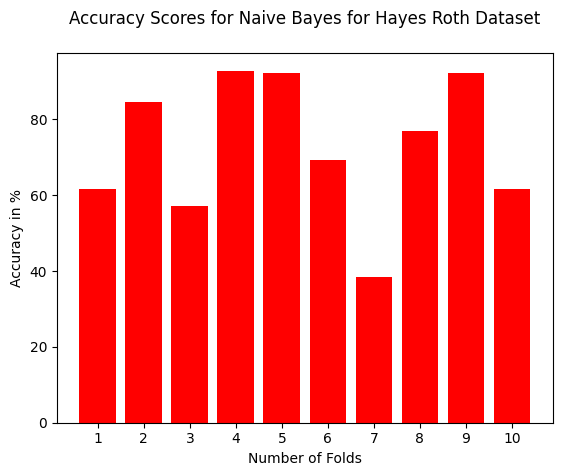

In [27]:
import matplotlib.pyplot as plt
folds_list = ["1","2","3","4","5","6","7","8","9","10"]
plt.title("Accuracy Scores for Naive Bayes for Hayes Roth Dataset\n")
plt.xlabel("Number of Folds")
plt.ylabel("Accuracy in %")
plt.bar(folds_list, acc_values_data1,color='red')

<BarContainer object of 10 artists>

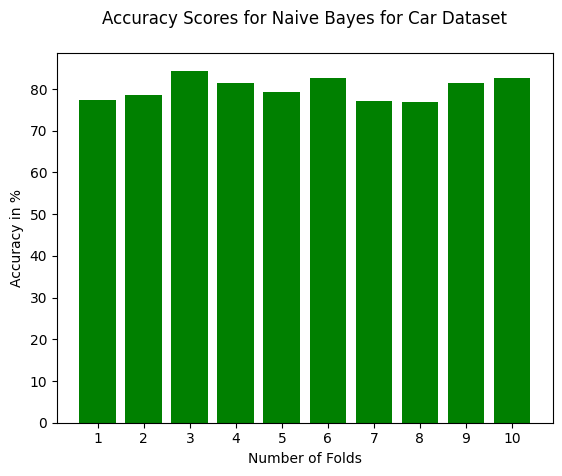

In [28]:
import matplotlib.pyplot as plt

plt.title("Accuracy Scores for Naive Bayes for Car Dataset\n")
plt.xlabel("Number of Folds")
plt.ylabel("Accuracy in %")
plt.bar(folds_list, acc_values_data2,color='green')

<BarContainer object of 10 artists>

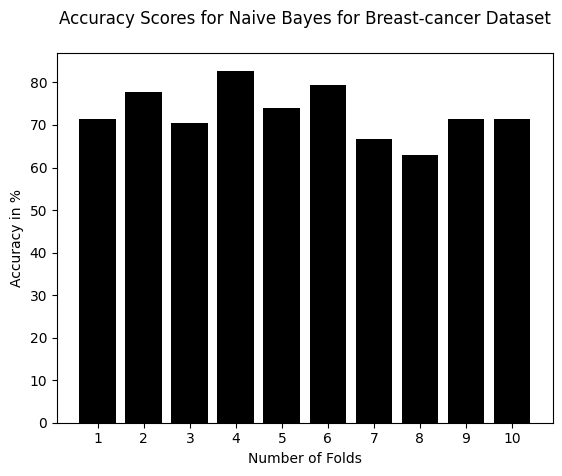

In [29]:
import matplotlib.pyplot as plt

plt.title("Accuracy Scores for Naive Bayes for Breast-cancer Dataset\n")
plt.xlabel("Number of Folds")
plt.ylabel("Accuracy in %")
plt.bar(folds_list, acc_values_data3,color='black')

In [30]:
cancer_dataset_weka = [75.86,86.20,86.20,72.41,68.96,72.41,75.00,67.85,71.42,71.42]
car_dataset_weka = [79.19,84.39,86.12,81.50,76.87,80.92,83.23,74.56,84.30,80.81]
hayes_roth_dataset_weka = [71.42,85.71,84.61,84.61,69.23,76.92,69.23,84.61,92.30,84.61]